<a href="https://colab.research.google.com/github/hank199599/data_science_from_scratch_reading_log/blob/main/Chapter14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 模型
假定我們要研究「使用者的朋友數量」與「使用者每天在網站上所花費的時間」兩者之間的關係。
現在,假設有2個常數α和β，能形成以下關係：
```
yi = βxi + α + εi
```
* yi ： 使用者i每天花在網站的分鐘數
* xi ： 使用者i的朋友數量
* εi ： 誤差項

In [1]:
#原始資料
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

假設可以找到一組 alpha 和 beta 值。  
我們可以用以下方式做簡單的預測：

In [2]:
def predict(alpha:float,beta:float,x_i:float) -> float:
  return beta* x_i + alpha

隨機選擇一組 alpha 和 beta 值，就可以給出每個輸出項x_i所對應的預設輸出值。  
由於我們得知實際的輸出值y_i，我們可以計算誤差值：

In [3]:
def error(alpha:float,beta:float,x_i:float,y_i:float) ->float:
  """
  用beta*x_i+alpha可算出預測值，
  再與實際值y_i比較，就可以計算其誤差值
  """
  return predict(alpha,beta,x_i) - y_i

## 誤差平方和
避免誤差之間因正負關係而互相抵消  


In [4]:
from typing import List
Vector = List[float]

def sum_of_squares(alpha:float,beta:float,x:Vector,y:Vector) ->float:
  return sum(error(alpha,beta,x_i,y_i)**2 for x_i , y_i in zip(x,y))

## 最小平方法(least squares solutions)
為求到最佳解，可以透過此方法來選擇alpha與beta的值，  
這種作法讓讓誤差平方和 sum_of_squares 盡可能越小越好。  
在這裡透過**微積分**的方法來求得最佳解。
```
yi = βxi + α + εi
```
* 選擇alpha值時：抉擇要如何去預測應變數y的平均值
* 選擇beta值時：輸入值增加一個x標準差的量時，預測值應增加的量

In [5]:
from typing import Tuple
from typing import List
import math

Vector = List[float]

def correlation(xs:List[float],ys:List[float]) ->float:

  stdev_x = standard_deviation(xs)
  stdev_y = standard_deviation(ys)
  if stdev_x > 0 and stdev_y > 0 :
    return covariance(xs,ys) / stdev_x / stdev_y
  else:
    return 0

def standard_deviation(xs:List[float]) ->float:
  return math.sqrt(variance(xs))

def mean(xs:List[float]) -> float:
  return sum(xs) / len(xs)

def de_mean(xs:List[float]) -> List[float]:
  x_bar = mean(xs)
  return [x - x_bar for x in xs] 

def covariance(xs:List[float],ys:List[float]) ->float:
  assert len(xs)==len(ys),"xs與ys的元素必須是相同的0"
  
  return dot(de_mean(xs),de_mean(ys))/(len(xs)-1)

#=======================================================

def dot(v:Vector,w:Vector)->float:
  #計算v_1*w_1+... +v_n*w_n
  assert len(v)==len(w),"兩個向量必須有相同的維度"

  return sum(v_i*w_i for v_i,w_i in zip(v,w))

def sum_of_squares(v:Vector) -> float:
  return dot(v,v)

def variance(xs:List[float]) ->float:
  assert len(xs),"至少有兩個元素才能計算變異數"

  n = len(xs)
  deviations = de_mean(xs)
  return sum_of_squares(deviations) / (n-1)

In [6]:
def least_squares_fit(x:Vector,y:Vector) ->Tuple[float,float]:
  """
  給定x與y兩個向量
  就可以找出最小平方和對應的alpha和beta值
  """
  beta = correlation(x,y)*standard_deviation(y)/standard_deviation(x)
  alpha = mean(y) - beta*mean(x)
  return alpha , beta

進行快速測試

In [7]:
x = [i for i in range(-100,110,10)]
y = [3*i -5 for i in x]

#應該能找出y=3x-5的關係
assert least_squares_fit(x,y) == (-5,3)

套用到「[第五章：統計學](https://colab.research.google.com/github/hank199599/data_science_from_scratch_reading_log/blob/main/Chapter5.ipynb#scrollTo=DQ3hgRZqL-1d)」那組已去除離群值的資料

In [8]:
num_friends_good = [49, 41, 40, 25, 21, 21, 19, 19, 18, 18, 16, 15, 15, 15, 15, 14, 14, 13, 13, 13, 13, 12, 12, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
daily_minutes_good = [68.77, 51.25, 52.08, 38.36, 44.54, 57.13, 51.4, 41.42, 31.22, 34.76, 54.01, 38.79, 47.59, 49.1, 27.66, 41.03, 36.73, 48.65, 28.12, 46.62, 35.57, 32.98, 35, 26.07, 23.77, 39.73, 40.57, 31.65, 31.21, 36.32, 20.45, 21.93, 26.02, 27.34, 23.49, 46.94, 30.5, 33.8, 24.23, 21.4, 27.94, 32.24, 40.57, 25.07, 19.42, 22.39, 18.42, 46.96, 23.72, 26.41, 26.97, 36.76, 40.32, 35.02, 29.47, 30.2, 31, 38.11, 38.18, 36.31, 21.03, 30.86, 36.07, 28.66, 29.08, 37.28, 15.28, 24.17, 22.31, 30.17, 25.53, 19.85, 35.37, 44.6, 17.23, 13.47, 26.33, 35.02, 32.09, 24.81, 19.33, 28.77, 24.26, 31.98, 25.73, 24.86, 16.28, 34.51, 15.23, 39.72, 40.8, 26.06, 35.76, 34.76, 16.13, 44.04, 18.03, 19.65, 32.62, 35.59, 39.43, 14.18, 35.24, 40.13, 41.82, 35.45, 36.07, 43.67, 24.61, 20.9, 21.9, 18.79, 27.61, 27.21, 26.61, 29.77, 20.59, 27.53, 13.82, 33.2, 25, 33.1, 36.65, 18.63, 14.87, 22.2, 36.81, 25.53, 24.62, 26.25, 18.21, 28.08, 19.42, 29.79, 32.8, 35.99, 28.32, 27.79, 35.88, 29.06, 36.28, 14.1, 36.63, 37.49, 26.9, 18.58, 38.48, 24.48, 18.95, 33.55, 14.24, 29.04, 32.51, 25.63, 22.22, 19, 32.73, 15.16, 13.9, 27.2, 32.01, 29.27, 33, 13.74, 20.42, 27.32, 18.23, 35.35, 28.48, 9.08, 24.62, 20.12, 35.26, 19.92, 31.02, 16.49, 12.16, 30.7, 31.22, 34.65, 13.13, 27.51, 33.2, 31.57, 14.1, 33.42, 17.44, 10.12, 24.42, 9.82, 23.39, 30.93, 15.03, 21.67, 31.09, 33.29, 22.61, 26.89, 23.48, 8.38, 27.81, 32.35, 23.84]

In [9]:
alpha , beta = least_squares_fit(num_friends_good,daily_minutes_good)
assert 22.9 < alpha < 23.0
assert 0.9 < beta < 0.905

根據我們的模型，我們可以預期：  
一個擁有**n個朋友**的使用者，每天會花**22.95+n*0.903分鐘**的時間在網站上。

### 圖 4-1 我們簡單的線性模型

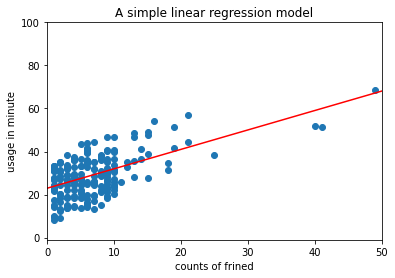

In [10]:
import matplotlib.pyplot as plt

plt.scatter(num_friends_good,daily_minutes_good) #將每個資料點繪上

xs = [i for i in range(0,51,1)]
ys = [22.95+n*0.903 for n in xs]
plt.plot(xs,ys,'r-')

plt.title("A simple linear regression model")
plt.axis([0,50,-1,100])
plt.xlabel("counts of frined")
plt.ylabel("usage in minute")
plt.show()

# 判定係數(coefficient of determination) / R平方
用來描述資料與模型相符的程度，能衡量這種所謂「**套入優度(Goodness of Fit)**」的作法。  
**衡量應變數的總變異量之中，模型所掌握到的比率**。

In [11]:
def mean(xs:List[float]) -> float:
  return sum(xs) / len(xs)

def de_mean(xs:List[float]) -> List[float]:
  x_bar = mean(xs)
  return [x - x_bar for x in xs] 


In [17]:
def error(alpha, beta, x_i, y_i):
    return y_i - predict(alpha, beta, x_i)

def sum_of_sqerrors(alpha, beta, x, y):
    return sum(error(alpha, beta, x_i, y_i) ** 2
               for x_i, y_i in zip(x, y))

def totoal_sum_squares(y:Vector) ->float:
  """每個y_i與平均值之間的差值的總平方和，即「總變異量」"""
  return sum(v**2 for v in de_mean(y))

def r_squares(alpha:float,beta:float,x:Vector,y:Vector) ->float:
  """
  模型掌握到y變異量的比率，即(1-模型未掌握到y變異量的比率)
  """
  return 1.0 - (sum_of_sqerrors(alpha,beta,x,y)/totoal_sum_squares(y))

In [24]:
rsq= r_squares(alpha,beta,num_friends_good,daily_minutes_good)
assert 0.328 < rsq < 0.330
print("%.3f"%rsq)

0.329


R平方的值越大，模型與資料相符的程度也越高。  
在這邊計算出的值 **0.329** 代表模型表現差強人意。

# 梯度遞減(gradient descent)
假設theta = [alpha , beta ]，
能夠過梯度遞減的做法來求解

In [25]:
import random
import tqdm

from typing import List

Vector = List[float]

def scalar_multiply(c:float,v:Vector) -> Vector:
  return [c*v_i for v_i in v]

def gradient_step(v:Vector,gradient:Vector,step_size:float) -> Vector:
  """從v沿著gradient的方向移動step_size的距離"""
  assert len(v) == len(gradient)
  step = scalar_multiply(step_size,gradient)
  return add(v,step)

In [28]:
num_epochs = 10000
random.seed(0)

guess = [random.random(),random.random()]

learning_rate = 0.00001

with tqdm.trange(num_epochs) as t:
  for _ in t:
    alpha , beta = t

    #損失相對於alpha的偏倒數
    grad_a = sum(2*error(alpha,beta,x_i,y_i)for x_i,y_i in zip(num_friends_good,daily_minutes_good))

    #損失相對於beta的偏倒數
    grad_b = sum(2*error(alpha,beta,x_i,y_i)for x_i,y_i in zip(num_friends_good,daily_minutes_good))

    #計算出損失值，並顯示在tqdm的說明文字中
    loss = sum_of_sqerrors(alpha,beta,num_friends_good,daily_minutes_good)
    t.set_description(f"loss:{loss:.3f}")

    #最後，更新guess的猜測值
    guess = gradient_step(guess , [grad_a,grad_b] , -learning_rate)

    

  0%|          | 0/10000 [00:00<?, ?it/s]


ValueError: ignored